### Import Libraries and code from lr.py

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from lr import *

### Load Train, Dev and Test datasets (preprocessed)

In [2]:
X, y = get_features("train.csv")
X_dev, y_dev = get_features("dev.csv")
X_test, _ = get_features("test.csv")

## Task 1


#### Closed form vs Batch GD

In [19]:
w1 = closed_soln(X,y/1e4) # get weights using closed from solution

# calculate RMSE on the dev set
r1 = compute_RMSE(torch.from_numpy(X_dev).cuda(0),torch.from_numpy(w1).cuda(0),torch.from_numpy(y_dev).cuda(0))
print("RMSE on the dev set: ", r1)

RMSE on the dev set:  228195.7197465307


Start..............RMSE on train = 771931.5406279642, RMSE on dev = 707631.2963627941
Epoch 1000..............RMSE on train = 272817.70522316766, RMSE on dev = 273744.9588824121
Epoch 2000..............RMSE on train = 248460.7271787299, RMSE on dev = 261899.74789112105
Epoch 3000..............RMSE on train = 234836.6751974987, RMSE on dev = 254074.91432320664
Epoch 4000..............RMSE on train = 225312.737172738, RMSE on dev = 248591.28599494084
Epoch 5000..............RMSE on train = 218068.4497563052, RMSE on dev = 244716.02773709482
Epoch 6000..............RMSE on train = 212278.98887463944, RMSE on dev = 241896.9940142841
Epoch 7000..............RMSE on train = 207497.68683422593, RMSE on dev = 239773.47131627804
Epoch 8000..............RMSE on train = 203458.51854781108, RMSE on dev = 238121.0058225901
Epoch 9000..............RMSE on train = 199991.10945601744, RMSE on dev = 236799.69950456664
Epoch 10000..............RMSE on train = 196979.48476355852, RMSE on dev = 235720.365

Epoch 88000..............RMSE on train = 168965.4878204551, RMSE on dev = 227533.27459902028
Epoch 89000..............RMSE on train = 168956.44674934118, RMSE on dev = 227510.08754499748
Epoch 90000..............RMSE on train = 168947.85303580732, RMSE on dev = 227487.35499725808
Epoch 91000..............RMSE on train = 168939.6808507162, RMSE on dev = 227465.0726841915
Epoch 92000..............RMSE on train = 168931.905970501, RMSE on dev = 227443.23609880143
Epoch 93000..............RMSE on train = 168924.505670147, RMSE on dev = 227421.84052022148
Epoch 94000..............RMSE on train = 168917.45862382653, RMSE on dev = 227400.88103417258
Epoch 95000..............RMSE on train = 168910.74481260031, RMSE on dev = 227380.35255237858
Epoch 96000..............RMSE on train = 168904.34543864874, RMSE on dev = 227360.2498309593
Epoch 97000..............RMSE on train = 168898.24284553766, RMSE on dev = 227340.5674878235
Epoch 98000..............RMSE on train = 168892.42044406533, RMSE on 

Epoch 176000..............RMSE on train = 168742.19444814482, RMSE on dev = 226656.20223532012
Epoch 177000..............RMSE on train = 168741.4570295026, RMSE on dev = 226653.96370750075
Epoch 178000..............RMSE on train = 168740.72709525717, RMSE on dev = 226651.80644695222
Epoch 179000..............RMSE on train = 168740.00443159512, RMSE on dev = 226649.72865047888
Epoch 180000..............RMSE on train = 168739.28883426636, RMSE on dev = 226647.72855573738
Epoch 181000..............RMSE on train = 168738.58010810838, RMSE on dev = 226645.80444039035
Epoch 182000..............RMSE on train = 168737.878066594, RMSE on dev = 226643.95462127065
Epoch 183000..............RMSE on train = 168737.18253140408, RMSE on dev = 226642.17745355898
Epoch 184000..............RMSE on train = 168736.49333202108, RMSE on dev = 226640.47132997357
Epoch 185000..............RMSE on train = 168735.81030534432, RMSE on dev = 226638.8346799722
Epoch 186000..............RMSE on train = 168735.13329

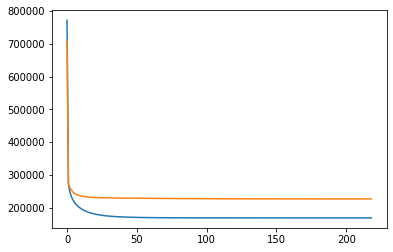

In [21]:
w2 = gradient_descent(X,y,X_dev,y_dev,lr=0.1) # get weights using the closed from solution

In [23]:
# calculate RMSE on the dev set
r2 = compute_RMSE(torch.from_numpy(X_dev).cuda(0),w2,torch.from_numpy(y_dev).cuda(0))
print("RMSE on the dev set: ", r2)

RMSE on the dev set:  226615.3705898587


In [24]:
# absolute difference between r1 and r2
print("Absolute difference:", abs(r1-r2))

Absolute difference: 1580.3491566719895


#### Stopping criterion used to determine when GD converges:

I have implemented the early stopping criteria to check GD convergence. The model stops training if this criteria is satisfied or if the user-set cap of 500,000 is reached, whichever happens first. I have outlined the early stopping implementation below:  
* Evaluate current performance on the dev set after every 100 epochs and compare it with the previous evaluation
* If current performance is better (lower RMSE), save current weights as the best weights and contunue training
* If the current performance is worse, increment a counter variable by one. The early stopping criteria has a patience parameter (p) set by the user (currently 5). 
* If the counter variable hits this patience threshold (p) before the epoch cap is reached, i.e. it continually performs worse on p consecutive checks , training will stop and the best weights (from last improvement step) will be returned  

Thus, this stopping criteria prevents overfitting by stopping training if dev set RMSE starts to increase while train set RMSE is still decreasing. 

#### SGD vs Batch GD

Start..............RMSE on train = 771931.5406279642, RMSE on dev = 707631.2963627941
Epoch 1..............RMSE on train = 332083.7923563257, RMSE on dev = 303267.759364993
Epoch 2..............RMSE on train = 305657.0560610101, RMSE on dev = 292198.6799660336
Epoch 3..............RMSE on train = 289702.20188980905, RMSE on dev = 284960.59567616286
Epoch 4..............RMSE on train = 278821.4790500513, RMSE on dev = 280243.75578033796
Epoch 5..............RMSE on train = 270797.58387492766, RMSE on dev = 276786.51473731594
Epoch 6..............RMSE on train = 264492.94366252463, RMSE on dev = 273958.74339608755
Epoch 7..............RMSE on train = 259289.76674848376, RMSE on dev = 271475.3590518129
Epoch 8..............RMSE on train = 254837.8023134366, RMSE on dev = 269211.4090883828
Epoch 9..............RMSE on train = 250929.46056208434, RMSE on dev = 267113.20166968193
Epoch 10..............RMSE on train = 247435.49954238583, RMSE on dev = 265157.4455545111
Epoch 11..............R

Epoch 91..............RMSE on train = 181481.97281099122, RMSE on dev = 233777.65850871868
Epoch 92..............RMSE on train = 181273.25745054847, RMSE on dev = 233719.5039473113
Epoch 93..............RMSE on train = 181068.9224030411, RMSE on dev = 233662.89703168257
Epoch 94..............RMSE on train = 180868.85791156397, RMSE on dev = 233607.78638558538
Epoch 95..............RMSE on train = 180672.95753506743, RMSE on dev = 233554.12236034023
Epoch 96..............RMSE on train = 180481.11802641908, RMSE on dev = 233501.85697164005
Epoch 97..............RMSE on train = 180293.23921600493, RMSE on dev = 233450.94383942516
Epoch 98..............RMSE on train = 180109.22390055252, RMSE on dev = 233401.3381306023
Epoch 99..............RMSE on train = 179928.9777368847, RMSE on dev = 233352.9965044034
Epoch 100..............RMSE on train = 179752.4091403314, RMSE on dev = 233305.87706020102
Epoch 101..............RMSE on train = 179579.42918754584, RMSE on dev = 233259.939287612
Epoch

Epoch 181..............RMSE on train = 172534.59863535134, RMSE on dev = 231408.03545747022
Epoch 182..............RMSE on train = 172494.69151869652, RMSE on dev = 231394.56244171047
Epoch 183..............RMSE on train = 172455.42814790303, RMSE on dev = 231381.17585650447
Epoch 184..............RMSE on train = 172416.7967717089, RMSE on dev = 231367.87354114637
Epoch 185..............RMSE on train = 172378.78588106163, RMSE on dev = 231354.6534163669
Epoch 186..............RMSE on train = 172341.38420344546, RMSE on dev = 231341.5134814842
Epoch 187..............RMSE on train = 172304.58069735998, RMSE on dev = 231328.45181164794
Epoch 188..............RMSE on train = 172268.36454694605, RMSE on dev = 231315.46655517622
Epoch 189..............RMSE on train = 172232.725156754, RMSE on dev = 231302.55593097876
Epoch 190..............RMSE on train = 172197.65214665074, RMSE on dev = 231289.7182260684
Epoch 191..............RMSE on train = 172163.13534686036, RMSE on dev = 231276.951793

Epoch 271..............RMSE on train = 170579.23314075763, RMSE on dev = 230412.43303362327
Epoch 272..............RMSE on train = 170568.79570422828, RMSE on dev = 230403.16357112513
Epoch 273..............RMSE on train = 170558.49993916458, RMSE on dev = 230393.9280051919
Epoch 274..............RMSE on train = 170548.34367089238, RMSE on dev = 230384.72628917318
Epoch 275..............RMSE on train = 170538.32476156237, RMSE on dev = 230375.55837775234
Epoch 276..............RMSE on train = 170528.4411094642, RMSE on dev = 230366.42422683872
Epoch 277..............RMSE on train = 170518.69064835622, RMSE on dev = 230357.32379346606
Epoch 278..............RMSE on train = 170509.07134680692, RMSE on dev = 230348.25703569257
Epoch 279..............RMSE on train = 170499.58120755132, RMSE on dev = 230339.22391250773
Epoch 280..............RMSE on train = 170490.2182668599, RMSE on dev = 230330.22438374162
Epoch 281..............RMSE on train = 170480.98059392016, RMSE on dev = 230321.258

Epoch 361..............RMSE on train = 170022.607360393, RMSE on dev = 229709.08439718862
Epoch 362..............RMSE on train = 170019.25087706308, RMSE on dev = 229702.68996233994
Epoch 363..............RMSE on train = 170015.93292057095, RMSE on dev = 229696.32484948065
Epoch 364..............RMSE on train = 170012.65297261984, RMSE on dev = 229689.9889827832
Epoch 365..............RMSE on train = 170009.41052257747, RMSE on dev = 229683.6822859271
Epoch 366..............RMSE on train = 170006.20506735312, RMSE on dev = 229677.40468210806
Epoch 367..............RMSE on train = 170003.0361112758, RMSE on dev = 229671.15609404596
Epoch 368..............RMSE on train = 169999.90316597495, RMSE on dev = 229664.93644399432
Epoch 369..............RMSE on train = 169996.80575026356, RMSE on dev = 229658.74565374866
Epoch 370..............RMSE on train = 169993.74339002272, RMSE on dev = 229652.5836446556
Epoch 371..............RMSE on train = 169990.71561808867, RMSE on dev = 229646.450337

Epoch 451..............RMSE on train = 169829.183419937, RMSE on dev = 229241.22901272256
Epoch 452..............RMSE on train = 169827.87794148317, RMSE on dev = 229237.13354493582
Epoch 453..............RMSE on train = 169826.5846617778, RMSE on dev = 229233.059566722
Epoch 454..............RMSE on train = 169825.30343480897, RMSE on dev = 229229.00698911687
Epoch 455..............RMSE on train = 169824.0341164955, RMSE on dev = 229224.9757232784
Epoch 456..............RMSE on train = 169822.7765646593, RMSE on dev = 229220.96568049034
Epoch 457..............RMSE on train = 169821.53063899803, RMSE on dev = 229216.97677216542
Epoch 458..............RMSE on train = 169820.29620105837, RMSE on dev = 229213.0089098493
Epoch 459..............RMSE on train = 169819.07311420958, RMSE on dev = 229209.0620052242
Epoch 460..............RMSE on train = 169817.86124361737, RMSE on dev = 229205.13597011214
Epoch 461..............RMSE on train = 169816.66045621823, RMSE on dev = 229201.2307164780

Epoch 541..............RMSE on train = 169747.33140577783, RMSE on dev = 228948.6896867127
Epoch 542..............RMSE on train = 169746.71030392847, RMSE on dev = 228946.19329543377
Epoch 543..............RMSE on train = 169746.09358577753, RMSE on dev = 228943.71117111424
Epoch 544..............RMSE on train = 169745.4812047066, RMSE on dev = 228941.24324449312
Epoch 545..............RMSE on train = 169744.8731146579, RMSE on dev = 228938.78944657344
Epoch 546..............RMSE on train = 169744.26927012642, RMSE on dev = 228936.34970862156
Epoch 547..............RMSE on train = 169743.66962615316, RMSE on dev = 228933.92396216816
Epoch 548..............RMSE on train = 169743.07413831787, RMSE on dev = 228931.51213900768
Epoch 549..............RMSE on train = 169742.482762732, RMSE on dev = 228929.11417119825
Epoch 550..............RMSE on train = 169741.89545603193, RMSE on dev = 228926.72999106208
Epoch 551..............RMSE on train = 169741.3121753722, RMSE on dev = 228924.359531

Epoch 631..............RMSE on train = 169704.67733486238, RMSE on dev = 228773.68478433444
Epoch 632..............RMSE on train = 169704.31494604153, RMSE on dev = 228772.2255661319
Epoch 633..............RMSE on train = 169703.95433897528, RMSE on dev = 228770.7754107562
Epoch 634..............RMSE on train = 169703.59549721377, RMSE on dev = 228769.33427144034
Epoch 635..............RMSE on train = 169703.23840448796, RMSE on dev = 228767.902101641
Epoch 636..............RMSE on train = 169702.88304470782, RMSE on dev = 228766.47885503765
Epoch 637..............RMSE on train = 169702.5294019597, RMSE on dev = 228765.0644855319
Epoch 638..............RMSE on train = 169702.1774605047, RMSE on dev = 228763.6589472466
Epoch 639..............RMSE on train = 169701.82720477617, RMSE on dev = 228762.26219452504
Epoch 640..............RMSE on train = 169701.47861937806, RMSE on dev = 228760.87418193053
Epoch 641..............RMSE on train = 169701.13168908248, RMSE on dev = 228759.49486424

Epoch 721..............RMSE on train = 169677.6476663169, RMSE on dev = 228673.69534999822
Epoch 722..............RMSE on train = 169677.39649303572, RMSE on dev = 228672.88879817963
Epoch 723..............RMSE on train = 169677.14614827104, RMSE on dev = 228672.08790569968
Epoch 724..............RMSE on train = 169676.8966256698, RMSE on dev = 228671.29264285017
Epoch 725..............RMSE on train = 169676.64791894218, RMSE on dev = 228670.50298007787
Epoch 726..............RMSE on train = 169676.4000218617, RMSE on dev = 228669.71888798446
Epoch 727..............RMSE on train = 169676.15292826373, RMSE on dev = 228668.94033732553
Epoch 728..............RMSE on train = 169675.90663204546, RMSE on dev = 228668.1672990097
Epoch 729..............RMSE on train = 169675.66112716479, RMSE on dev = 228667.3997440982
Epoch 730..............RMSE on train = 169675.4164076398, RMSE on dev = 228666.63764380393
Epoch 731..............RMSE on train = 169675.17246754796, RMSE on dev = 228665.880969

Epoch 811..............RMSE on train = 169657.7499576755, RMSE on dev = 228620.64800163594
Epoch 812..............RMSE on train = 169657.55388789863, RMSE on dev = 228620.24832335365
Epoch 813..............RMSE on train = 169657.3582642258, RMSE on dev = 228619.85217422782
Epoch 814..............RMSE on train = 169657.16308396857, RMSE on dev = 228619.45953591925
Epoch 815..............RMSE on train = 169656.9683444629, RMSE on dev = 228619.07039018843
Epoch 816..............RMSE on train = 169656.77404306844, RMSE on dev = 228618.68471889518
Epoch 817..............RMSE on train = 169656.58017716857, RMSE on dev = 228618.30250399778
Epoch 818..............RMSE on train = 169656.38674417013, RMSE on dev = 228617.9237275528
Epoch 819..............RMSE on train = 169656.19374150308, RMSE on dev = 228617.54837171445
Epoch 820..............RMSE on train = 169656.00116662044, RMSE on dev = 228617.17641873422
Epoch 821..............RMSE on train = 169655.80901699763, RMSE on dev = 228616.8078

Epoch 901..............RMSE on train = 169641.62680674734, RMSE on dev = 228596.8901446458
Epoch 902..............RMSE on train = 169641.46242644318, RMSE on dev = 228596.7451299689
Epoch 903..............RMSE on train = 169641.29832370515, RMSE on dev = 228596.60233802395
Epoch 904..............RMSE on train = 169641.13449728076, RMSE on dev = 228596.46175762493
Epoch 905..............RMSE on train = 169640.97094592743, RMSE on dev = 228596.32337764796
Epoch 906..............RMSE on train = 169640.80766841242, RMSE on dev = 228596.18718703015
Epoch 907..............RMSE on train = 169640.64466351265, RMSE on dev = 228596.0531747694
Epoch 908..............RMSE on train = 169640.48193001465, RMSE on dev = 228595.92132992428
Epoch 909..............RMSE on train = 169640.3194667145, RMSE on dev = 228595.79164161356
Epoch 910..............RMSE on train = 169640.15727241774, RMSE on dev = 228595.66409901573
Epoch 911..............RMSE on train = 169639.9953459392, RMSE on dev = 228595.53869

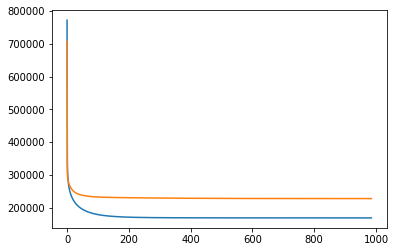

In [25]:
w3 = sgd(X,y,X_dev,y_dev, lr=0.01)

In [26]:
# calculate RMSE on the dev set
r3 = compute_RMSE(torch.from_numpy(X_dev).cuda(0),w3,torch.from_numpy(y_dev).cuda(0))
print("RMSE on the dev set: ", r3)

# absolute difference between r1 and r2
print("Absolute difference:", abs(r2-r3))

RMSE on the dev set:  228591.4829743926
Absolute difference: 1976.112384533888


## Task 2


#### L-2 Regularization

Start..............RMSE on train = 771931.5406279642, RMSE on dev = 707631.2963627941
Epoch 1000..............RMSE on train = 273306.47540322616, RMSE on dev = 273799.66373693175
Epoch 2000..............RMSE on train = 249334.7936429003, RMSE on dev = 262031.74253415488
Epoch 3000..............RMSE on train = 236115.53049027573, RMSE on dev = 254400.7017795833
Epoch 4000..............RMSE on train = 226998.80675314192, RMSE on dev = 249135.71888781682
Epoch 5000..............RMSE on train = 220148.50888197406, RMSE on dev = 245458.65074289765
Epoch 6000..............RMSE on train = 214737.7023779214, RMSE on dev = 242808.89265171665
Epoch 7000..............RMSE on train = 210320.09667593497, RMSE on dev = 240828.17959732804
Epoch 8000..............RMSE on train = 206629.46706649425, RMSE on dev = 239296.08893698276
Epoch 9000..............RMSE on train = 203494.63853139876, RMSE on dev = 238076.05740774306
Epoch 10000..............RMSE on train = 200798.695677758, RMSE on dev = 237081.

Epoch 88000..............RMSE on train = 176640.02089829402, RMSE on dev = 229351.57517697415
Epoch 89000..............RMSE on train = 176631.73139514902, RMSE on dev = 229346.11044969
Epoch 90000..............RMSE on train = 176623.87617528718, RMSE on dev = 229340.89071453083
Epoch 91000..............RMSE on train = 176616.4312421756, RMSE on dev = 229335.90519189386
Epoch 92000..............RMSE on train = 176609.37400523835, RMSE on dev = 229331.143569779
Epoch 93000..............RMSE on train = 176602.68319168375, RMSE on dev = 229326.59598365612
Epoch 94000..............RMSE on train = 176596.3387643193, RMSE on dev = 229322.25299721782
Epoch 95000..............RMSE on train = 176590.32184490826, RMSE on dev = 229318.10558397346
Epoch 96000..............RMSE on train = 176584.6146426613, RMSE on dev = 229314.14510964276
Epoch 97000..............RMSE on train = 176579.20038748567, RMSE on dev = 229310.36331531245
Epoch 98000..............RMSE on train = 176574.06326764874, RMSE on

Epoch 176000..............RMSE on train = 176476.2975486788, RMSE on dev = 229234.04617176324
Epoch 177000..............RMSE on train = 176476.17561300535, RMSE on dev = 229233.9755190702
Epoch 178000..............RMSE on train = 176476.0587162249, RMSE on dev = 229233.90885455394
Epoch 179000..............RMSE on train = 176475.9466344801, RMSE on dev = 229233.8459847667
Epoch 180000..............RMSE on train = 176475.83915438707, RMSE on dev = 229233.78672519416
Epoch 181000..............RMSE on train = 176475.73607252561, RMSE on dev = 229233.73089985157
Epoch 182000..............RMSE on train = 176475.63719495462, RMSE on dev = 229233.6783408973
Epoch 183000..............RMSE on train = 176475.54233675217, RMSE on dev = 229233.62888826441
Epoch 184000..............RMSE on train = 176475.45132157885, RMSE on dev = 229233.5823893079
Epoch 185000..............RMSE on train = 176475.36398126266, RMSE on dev = 229233.53869846827
Epoch 186000..............RMSE on train = 176475.28015540

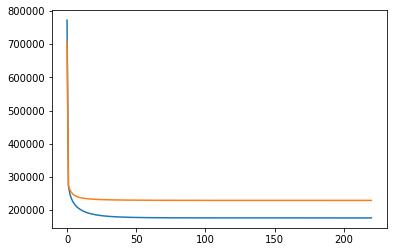

In [27]:
w4 = pnorm(X,y,X_dev,y_dev, lr=0.1, lam=1e-4, l=2)

In [29]:
# calculate RMSE on the dev set
r4 = compute_RMSE(torch.from_numpy(X_dev).cuda(0),w4,torch.from_numpy(y_dev).cuda(0))
print("RMSE on the dev set: ", r4)

RMSE on the dev set:  229233.0241678528


#### L-4 Regularization

Start..............RMSE on train = 771931.5406279642, RMSE on dev = 707631.2963627941
Epoch 1000..............RMSE on train = 272821.2683030329, RMSE on dev = 273744.140409635
Epoch 2000..............RMSE on train = 248468.3842115054, RMSE on dev = 261898.2002230337
Epoch 3000..............RMSE on train = 234850.57234233682, RMSE on dev = 254078.59977210904
Epoch 4000..............RMSE on train = 225335.42553140986, RMSE on dev = 248604.66340171004
Epoch 5000..............RMSE on train = 218102.35127478905, RMSE on dev = 244741.3090822772
Epoch 6000..............RMSE on train = 212326.56613986517, RMSE on dev = 241935.04919881123
Epoch 7000..............RMSE on train = 207561.46074855802, RMSE on dev = 239824.3979406148
Epoch 8000..............RMSE on train = 203540.98311859183, RMSE on dev = 238184.39853378717
Epoch 9000..............RMSE on train = 200094.63038227492, RMSE on dev = 236874.77532555434
Epoch 10000..............RMSE on train = 197106.21877851224, RMSE on dev = 235806.02

Epoch 90000..............RMSE on train = 169764.67969001888, RMSE on dev = 224344.0591268344
Epoch 91000..............RMSE on train = 169754.13358807098, RMSE on dev = 224274.99425875043
Epoch 92000..............RMSE on train = 169744.00348647256, RMSE on dev = 224206.71539412576
Epoch 93000..............RMSE on train = 169734.2678414056, RMSE on dev = 224139.21904683454
Epoch 94000..............RMSE on train = 169724.90636604745, RMSE on dev = 224072.50129952806
Epoch 95000..............RMSE on train = 169715.89995022415, RMSE on dev = 224006.55783807265
Epoch 96000..............RMSE on train = 169707.2305856955, RMSE on dev = 223941.38398407196
Epoch 97000..............RMSE on train = 169698.881296635, RMSE on dev = 223876.9747255497
Epoch 98000..............RMSE on train = 169690.8360749077, RMSE on dev = 223813.32474586985
Epoch 99000..............RMSE on train = 169683.07981978147, RMSE on dev = 223750.4284509703
Epoch 100000..............RMSE on train = 169675.59828173683, RMSE o

Epoch 178000..............RMSE on train = 169430.38279839893, RMSE on dev = 220585.63221424693
Epoch 179000..............RMSE on train = 169428.90042489552, RMSE on dev = 220561.87530963743
Epoch 180000..............RMSE on train = 169427.43416895956, RMSE on dev = 220538.39776845142
Epoch 181000..............RMSE on train = 169425.9836893085, RMSE on dev = 220515.19611977573
Epoch 182000..............RMSE on train = 169424.5486560997, RMSE on dev = 220492.26694349156
Epoch 183000..............RMSE on train = 169423.12875045522, RMSE on dev = 220469.60686947274
Epoch 184000..............RMSE on train = 169421.72366400875, RMSE on dev = 220447.212576792
Epoch 185000..............RMSE on train = 169420.3330984739, RMSE on dev = 220425.08079293478
Epoch 186000..............RMSE on train = 169418.95676523237, RMSE on dev = 220403.20829302317
Epoch 187000..............RMSE on train = 169417.59438494174, RMSE on dev = 220381.59189904714
Epoch 188000..............RMSE on train = 169416.245687

Epoch 266000..............RMSE on train = 169339.71251227419, RMSE on dev = 219275.67004501994
Epoch 267000..............RMSE on train = 169338.9916675118, RMSE on dev = 219267.2814802503
Epoch 268000..............RMSE on train = 169338.27568063114, RMSE on dev = 219258.9948768637
Epoch 269000..............RMSE on train = 169337.56450831416, RMSE on dev = 219250.80915277373
Epoch 270000..............RMSE on train = 169336.8581078812, RMSE on dev = 219242.723238462
Epoch 271000..............RMSE on train = 169336.1564372756, RMSE on dev = 219234.73607680274
Epoch 272000..............RMSE on train = 169335.459455049, RMSE on dev = 219226.84662289039
Epoch 273000..............RMSE on train = 169334.76712034698, RMSE on dev = 219219.05384386974
Epoch 274000..............RMSE on train = 169334.07939289536, RMSE on dev = 219211.3567187696
Epoch 275000..............RMSE on train = 169333.39623298647, RMSE on dev = 219203.75423833902
Epoch 276000..............RMSE on train = 169332.71760146623

Epoch 354000..............RMSE on train = 169291.1914882998, RMSE on dev = 218832.79528561953
Epoch 355000..............RMSE on train = 169290.77910373904, RMSE on dev = 218830.2992475814
Epoch 356000..............RMSE on train = 169290.36921463255, RMSE on dev = 218827.84402437782
Epoch 357000..............RMSE on train = 169289.96180415168, RMSE on dev = 218825.4291967973
Epoch 358000..............RMSE on train = 169289.55685560452, RMSE on dev = 218823.05434984094
Epoch 359000..............RMSE on train = 169289.15435243433, RMSE on dev = 218820.71907267542
Epoch 360000..............RMSE on train = 169288.75427821776, RMSE on dev = 218818.4229585873
Epoch 361000..............RMSE on train = 169288.35661666328, RMSE on dev = 218816.16560493663
Epoch 362000..............RMSE on train = 169287.96135160993, RMSE on dev = 218813.94661311287
Epoch 363000..............RMSE on train = 169287.5684670254, RMSE on dev = 218811.76558848968
Epoch 364000..............RMSE on train = 169287.177947

Epoch 441000..............RMSE on train = 169263.12198821726, RMSE on dev = 218731.79982144217
Epoch 442000..............RMSE on train = 169262.8754660383, RMSE on dev = 218731.64714406471
Epoch 443000..............RMSE on train = 169262.6303622931, RMSE on dev = 218731.5106766298
Epoch 444000..............RMSE on train = 169262.3866680683, RMSE on dev = 218731.39023946878
Epoch 445000..............RMSE on train = 169262.14437451097, RMSE on dev = 218731.28565460615
Epoch 446000..............RMSE on train = 169261.9034728277, RMSE on dev = 218731.19674574301
Epoch 447000..............RMSE on train = 169261.66395428442, RMSE on dev = 218731.12333824032
Epoch 448000..............RMSE on train = 169261.42581020595, RMSE on dev = 218731.06525910302
Epoch 449000..............RMSE on train = 169261.1890319754, RMSE on dev = 218731.02233696345
Epoch 450000..............RMSE on train = 169260.9536110339, RMSE on dev = 218730.99440206576
Epoch 451000..............RMSE on train = 169260.71953887

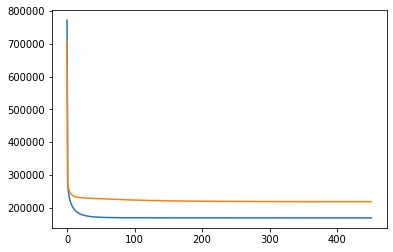

In [28]:
w5 = pnorm(X,y,X_dev,y_dev, lr=0.1, lam=1e-10, l=4)

In [30]:
# calculate RMSE on the dev set
r5 = compute_RMSE(torch.from_numpy(X_dev).cuda(0),w5,torch.from_numpy(y_dev).cuda(0))
print("RMSE on the dev set: ", r5)

RMSE on the dev set:  218730.98015190024


## Task 3


#### Basis Functions Implementation

In [31]:
# Get dataset with basis function implementation
X, y = get_features_basis("train.csv")
X_dev, y_dev = get_features_basis("dev.csv")
X_test, _ = get_features_basis("test.csv")

Start..............RMSE on train = 796318.4560124394, RMSE on dev = 733261.3694155194
Epoch 1000..............RMSE on train = 315293.0142816569, RMSE on dev = 288820.500858678
Epoch 2000..............RMSE on train = 286185.16860490624, RMSE on dev = 272949.0967272289
Epoch 3000..............RMSE on train = 270322.0596758953, RMSE on dev = 266066.5355440907
Epoch 4000..............RMSE on train = 260087.2261783779, RMSE on dev = 261989.63170754674
Epoch 5000..............RMSE on train = 252633.3442187666, RMSE on dev = 258894.32829688073
Epoch 6000..............RMSE on train = 246754.94383892024, RMSE on dev = 256228.3223203992
Epoch 7000..............RMSE on train = 241885.70109047883, RMSE on dev = 253833.46224498676
Epoch 8000..............RMSE on train = 237728.5012997005, RMSE on dev = 251667.52601324118
Epoch 9000..............RMSE on train = 234109.01911636375, RMSE on dev = 249716.4083047093
Epoch 10000..............RMSE on train = 230914.23290237217, RMSE on dev = 247968.714379

Epoch 89000..............RMSE on train = 182032.10596469342, RMSE on dev = 229874.1708776262
Epoch 90000..............RMSE on train = 181904.38834425245, RMSE on dev = 229844.41293809577
Epoch 91000..............RMSE on train = 181779.6570372261, RMSE on dev = 229815.19066850835
Epoch 92000..............RMSE on train = 181657.82815502005, RMSE on dev = 229786.48549421265
Epoch 93000..............RMSE on train = 181538.82067497305, RMSE on dev = 229758.2797629416
Epoch 94000..............RMSE on train = 181422.55632148375, RMSE on dev = 229730.55669675473
Epoch 95000..............RMSE on train = 181308.9594530848, RMSE on dev = 229703.30034646706
Epoch 96000..............RMSE on train = 181197.956955107, RMSE on dev = 229676.49554842457
Epoch 97000..............RMSE on train = 181089.4781376023, RMSE on dev = 229650.12788350004
Epoch 98000..............RMSE on train = 180983.45463821854, RMSE on dev = 229624.18363819175
Epoch 99000..............RMSE on train = 180879.8203297383, RMSE on

Epoch 177000..............RMSE on train = 176946.04347855935, RMSE on dev = 228354.1565709569
Epoch 178000..............RMSE on train = 176924.6681947467, RMSE on dev = 228344.4771974396
Epoch 179000..............RMSE on train = 176903.67468688893, RMSE on dev = 228334.90985251474
Epoch 180000..............RMSE on train = 176883.05542420017, RMSE on dev = 228325.45335133094
Epoch 181000..............RMSE on train = 176862.8030432294, RMSE on dev = 228316.10652152362
Epoch 182000..............RMSE on train = 176842.91034361356, RMSE on dev = 228306.86820291917
Epoch 183000..............RMSE on train = 176823.3702839535, RMSE on dev = 228297.73724725525
Epoch 184000..............RMSE on train = 176804.1759778094, RMSE on dev = 228288.7125179198
Epoch 185000..............RMSE on train = 176785.32068981213, RMSE on dev = 228279.792889705
Epoch 186000..............RMSE on train = 176766.79783188505, RMSE on dev = 228270.9772485763
Epoch 187000..............RMSE on train = 176748.6009595755,

Epoch 265000..............RMSE on train = 175971.9905482368, RMSE on dev = 227824.01317934218
Epoch 266000..............RMSE on train = 175967.1438751458, RMSE on dev = 227820.68575820024
Epoch 267000..............RMSE on train = 175962.3738435003, RMSE on dev = 227817.3997639883
Epoch 268000..............RMSE on train = 175957.6791640088, RMSE on dev = 227814.15470002973
Epoch 269000..............RMSE on train = 175953.05857065812, RMSE on dev = 227810.9500750666
Epoch 270000..............RMSE on train = 175948.51082025573, RMSE on dev = 227807.78540321434
Epoch 271000..............RMSE on train = 175944.03469198197, RMSE on dev = 227804.66020391576
Epoch 272000..............RMSE on train = 175939.628986952, RMSE on dev = 227801.57400189523
Epoch 273000..............RMSE on train = 175935.29252778747, RMSE on dev = 227798.5263271139
Epoch 274000..............RMSE on train = 175931.02415819687, RMSE on dev = 227795.5167147233
Epoch 275000..............RMSE on train = 175926.82274256545

Epoch 353000..............RMSE on train = 175737.9279686706, RMSE on dev = 227646.1981847627
Epoch 354000..............RMSE on train = 175736.66823737737, RMSE on dev = 227645.10886376596
Epoch 355000..............RMSE on train = 175735.42692946363, RMSE on dev = 227644.0333643282
Epoch 356000..............RMSE on train = 175734.20376074003, RMSE on dev = 227642.97151123977
Epoch 357000..............RMSE on train = 175732.99845162395, RMSE on dev = 227641.92313145965
Epoch 358000..............RMSE on train = 175731.81072706133, RMSE on dev = 227640.88805409032
Epoch 359000..............RMSE on train = 175730.6403164487, RMSE on dev = 227639.86611035245
Epoch 360000..............RMSE on train = 175729.4869535574, RMSE on dev = 227638.8571335604
Epoch 361000..............RMSE on train = 175728.3503764592, RMSE on dev = 227637.86095909763
Epoch 362000..............RMSE on train = 175727.2303274526, RMSE on dev = 227636.87742439215
Epoch 363000..............RMSE on train = 175726.126552991

Epoch 441000..............RMSE on train = 175674.69691524317, RMSE on dev = 227588.21387531474
Epoch 442000..............RMSE on train = 175674.33638424412, RMSE on dev = 227587.85823252544
Epoch 443000..............RMSE on train = 175673.98075406556, RMSE on dev = 227587.50704782887
Epoch 444000..............RMSE on train = 175673.62995381246, RMSE on dev = 227587.1602640906
Epoch 445000..............RMSE on train = 175673.28391366417, RMSE on dev = 227586.81782491013
Epoch 446000..............RMSE on train = 175672.94256485725, RMSE on dev = 227586.47967461144
Epoch 447000..............RMSE on train = 175672.6058396692, RMSE on dev = 227586.14575823382
Epoch 448000..............RMSE on train = 175672.2736714016, RMSE on dev = 227585.8160215226
Epoch 449000..............RMSE on train = 175671.9459943644, RMSE on dev = 227585.49041092105
Epoch 450000..............RMSE on train = 175671.62274385933, RMSE on dev = 227585.16887356015
Epoch 451000..............RMSE on train = 175671.303856

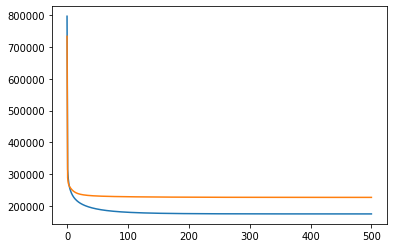

In [33]:
w6 = pnorm(X,y,X_dev,y_dev, lr=0.03, lam=1e-4, l=2)

In [34]:
# calculate RMSE on the dev set
r6 = compute_RMSE(torch.from_numpy(X_dev).cuda(0),w6,torch.from_numpy(y_dev).cuda(0))
print("RMSE on the dev set: ", r6)

# compare with SGD performance on dataset without basis functions applied
print("Basis function implementation resulted in an RMSE decrease of:", r4-r6)

RMSE on the dev set:  227573.29355538535
Basis function implementation resulted in an RMSE decrease of: 1659.7306124674506


#### Justification of choice of basis function

I have applied the exponential function as the basis functions to the first 7 features of the input. These features are _year, km_driven, power, seats, torque, engine and mileage._  
I have chosen the exponential function for basis as my normalization brings my data in the 0-1 range. By applying exponential function (which has a slope greater than that of linear function (>1) in this range) on this, the spread of the data is improved and this helps the model better discriminate between examples and get more accurate predictions. 


## Task 4

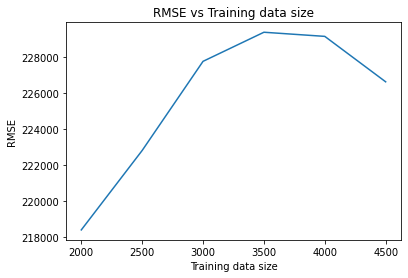

In [11]:
sizes = [2000, 2500, 3000, 3500, 4000, 4500]
rmses = []
for n in sizes:
    X1, y1 = X[:n], y[:n]
    w_ = gradient_descent(X1, y1, X_dev, y_dev, lr=0.1)
    rmses.append(compute_RMSE(torch.from_numpy(X_dev).cuda(0),w_,torch.from_numpy(y_dev).cuda(0)))
plt.plot(sizes, rmses)
plt.title("RMSE vs Training data size")
plt.xlabel("Training data size")
plt.ylabel("RMSE")
plt.savefig("task4.png")
plt.show()

## Task 5

In [56]:
features = np.array(["year", "km", "power", "seats", "torque", "engine", "mileage",
            "fuel", "seller", "transmission", "owner", "name"])
w_ = np.abs(w2.detach().cpu().numpy())
w_significant = np.array([max(w_[7:10]), max(w_[10:12]), max(w_[12:13]), max(w_[13:17]), max(w_[17:])])
w_significant = np.append(w_[:7], w_significant)
indices = np.argsort(w_significant)
print(list(features[indices]))

['seller', 'seats', 'fuel', 'transmission', 'torque', 'mileage', 'engine', 'km', 'year', 'power', 'owner', 'name']


* The list above indicates the order of features from least important to most important. 
* We clearly see that the **2 least important features are "seller type" and "number of seats"**
* The importance of features was identified as follows: Weights corresponding to the less important features will have lower magnitudes, so there is less effect of these features on the price estimation. 
* The weight with the maximum magnitude was considered among weights for one-hot encoded features as they correspong to the most important information that feature is giving the model 

## Task 6

In [12]:
main()

TypeError: sum(): argument 'input' (position 1) must be Tensor, not numpy.ndarray